<a href="https://www.kaggle.com/code/zittagustavo/redes-neurais-sequenciais-introducao?scriptVersionId=123048987" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# REDES NEURAIS SEQUENCIAIS (INTRODUÇÃO)


Tambem chamado em portugues de:
# ***RNS***

Esse notebook é uma introdução basica a **REDES NEURAIS SEQUENCIAIS** utilizando o keras, dividi em 4 redes distintas, aumentando a complexidade a medida que passamos de redes e plotando as diferenças graficas entre elas.

Series temporais são muito complexas, este é um [link](https://www.ppgee.ufmg.br/defesas/290M.PDF) de um pdf (em portugues) se tiver mais curiosidade sobre este assunto.

* Rede Neural Sequencial 1 - Apenas um neuronio, apenas uma camada.
* Rede Neural Sequencial 2 - 17 neuronios, inicializando os pesos diferentes, e funçoes diferentes(sigmoid)
* Rede Neural Sequencial 3 - 73 neuronios, utilizando o atraso de 1
* Rede Neural Sequencial 3 - 73 neuronios, utilizando o atraso de 4

# Sumario das variaveis
* dados=dados brutos
* dados_escalados=dados com standard scaller
* x=coluna da data
* y=coluna dos passageiros
* tamanho_treino=90% dos dados
* tamanho_teste=10% dos dados
* x_treino
* y_treino
* x_teste
* y_teste
* regressor=rede neural sequencial
* y_predict=prediçao de treino
* y_predict_teste=prediçao de teste(target)
* resultados=dataframe com os dados escalados
* resultado_trans= dataframe com os resultados em metricas padroes(destransformados)
* resultado_trans_teste= dataframe com o predict de teste ja em metrica padrao(destransformados)
* regressor2=rede neural sequencial 2
* x_treino_novo=dados com o atraso temporal
* vetor2 = dados com atraso de 1 convertido em dataframe


## Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# EDA explorando os dados

In [2]:
dados=pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')

In [3]:
dados.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Dados originais plotados

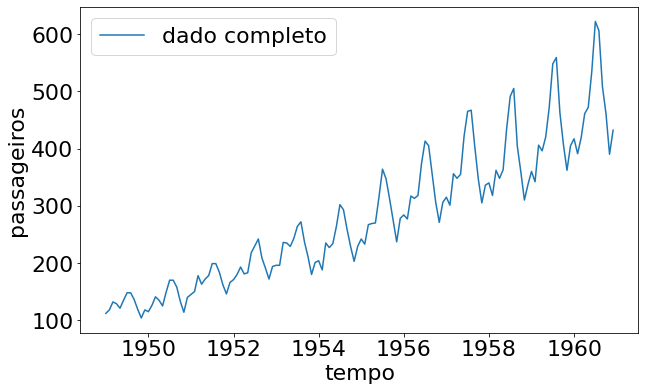

In [4]:
mpl.rcParams['figure.figsize']=(10,6)
mpl.rcParams['font.size']=22
sns.lineplot(x='tempo',y='passageiros',data=dados,label='dado completo');

### Escalando os dados

In [5]:
sc=StandardScaler()
sc.fit(dados)
dados_escalado=sc.transform(dados)
#Separando x e o y(target)
x=dados_escalado[:,0]
y=dados_escalado[:,1]

### Plotando os dados na escala

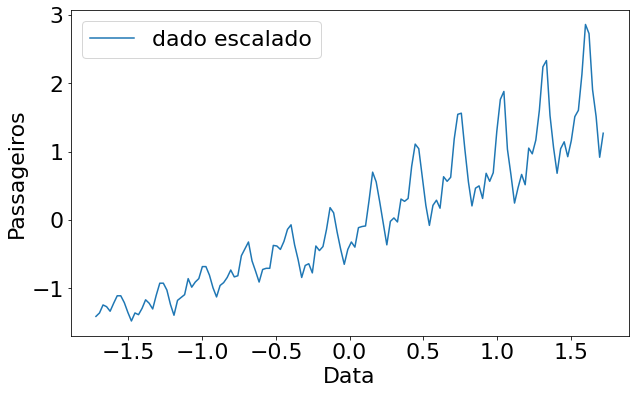

In [6]:
sns.lineplot(x=x,y=y,label='dado escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data');

## Fazendo uma divisao de treino e teste na mão

In [7]:
tamanho_treino=int(len(dados)*0.9)#separando 90% dos dados para treino
tamanho_teste=len(dados)-tamanho_treino#separando 10% dos dados para teste
#separando os dados dos targets para treino
x_treino=x[0:tamanho_treino]
y_treino=y[0:tamanho_treino]
#separando os dados dos targets para treino
x_teste=x[tamanho_treino:len(dados)]
y_teste=y[tamanho_treino:len(dados)]

## Plotando o que é treino e o que é teste escalado

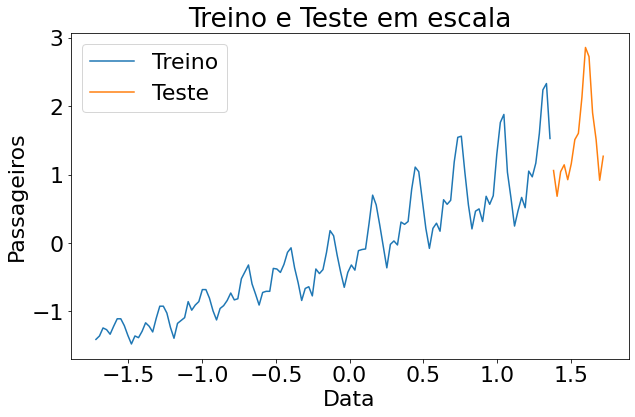

In [8]:
sns.lineplot(x=x_treino,y=y_treino,label='Treino')
sns.lineplot(x=x_teste,y=y_teste,label='Teste')
plt.title('Treino e Teste em escala')
plt.ylabel('Passageiros')
plt.xlabel('Data');

# Rede Neural Sequencial 1

Essa rede é apenas uma demonstração de uma rede neural sequencial de apenas uma camada e um neuronio, sendo nesse neuronio uma função de ativação muito simples (linear), sem o uso de vies, mas usando um otimizador bom (adam). Fica mais facil para a compreensão da mesma.

In [9]:
regressor=Sequential()#inicializando a rede
regressor.add(Dense(1,input_dim=1,kernel_initializer='Ones',use_bias=False,activation='linear'))#adicionando a primeira camada
regressor.compile(loss='mean_squared_error',optimizer='adam');#compilando 
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [10]:
#treinando o modelo
regressor.fit(x_treino,y_treino);

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [11]:
#dando o predict no TREINO
y_predict=regressor.predict(x_treino)

## Plotando os dados escalados com a linha de ajuste de treino

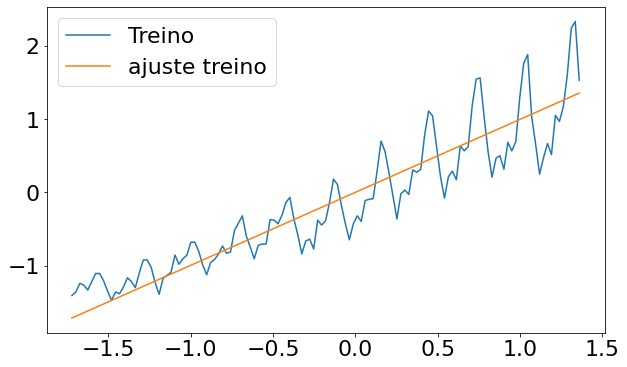

In [12]:
sns.lineplot(x=x_treino,y=y_treino,label='Treino')
sns.lineplot(x=x_treino,y=y_predict[:,0],label='ajuste treino');

## Tirando os dados que estavam na escala("Destransformando")

In [13]:
#alocando temporariamento os dados para passar para um dataframe
d={'tempo': x_treino,'passageiros': y_predict[:,0]}
resultados=pd.DataFrame(data=d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.713262
1,-1.696007,-1.689300
2,-1.671950,-1.665339
3,-1.647894,-1.641377
4,-1.623837,-1.617415


In [14]:
#tirando da escala
resultado_trans=sc.inverse_transform(resultados)
resultado_trans=pd.DataFrame(resultado_trans)
resultado_trans.columns=['tempo','passageiros']

## Plotando os dados de treino e teste SEM o predict

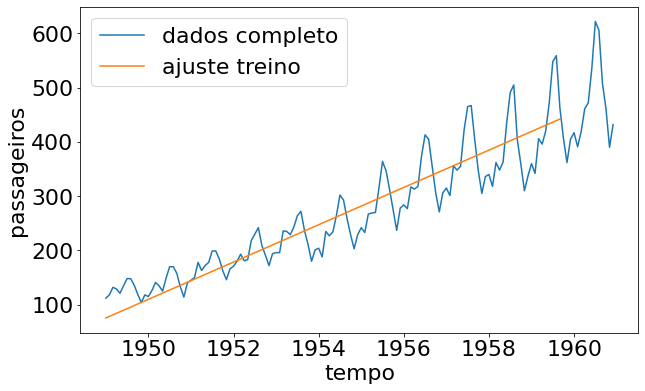

In [15]:
sns.lineplot(x='tempo',y='passageiros',data=dados,label='dados completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trans,label='ajuste treino');

### Dando predict no x_teste 

In [16]:
y_predict_teste=regressor.predict(x_teste)
d={'tempo': x_teste,'passageiros': y_predict_teste[:,0]}
resultados_teste=pd.DataFrame(data=d)
resultado_trans_teste=sc.inverse_transform(resultados_teste)
resultado_trans_teste=pd.DataFrame(resultado_trans_teste)
resultado_trans_teste.columns=['tempo','passageiros']

## Plotando treino e teste destransformados e com a previsao

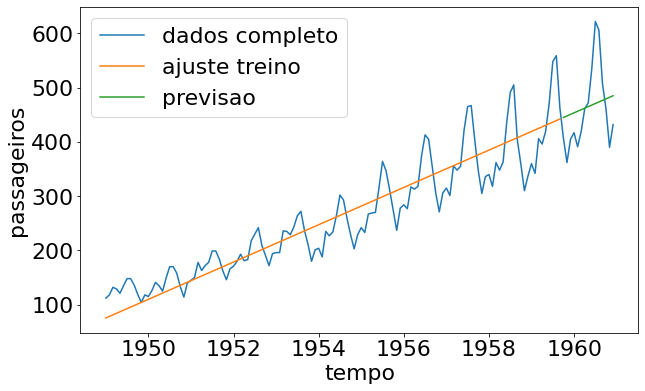

In [17]:
sns.lineplot(x='tempo',y='passageiros',data=dados,label='dados completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trans,label='ajuste treino')
sns.lineplot(x='tempo',y='passageiros',data=resultado_trans_teste,label='previsao');

# Rede Neural Sequencial 2

In [18]:
regressor2=Sequential()
regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor2.compile(loss='mean_squared_error' ,optimizer='adam')
regressor2.summary()
regressor2.fit(x_treino,y_treino,epochs=200)
y_predict=regressor2.predict(x_treino)
y_predict_teste=regressor2.predict(x_teste)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8249
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8198
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8167
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.8136
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.810

## Plotando treino e teste com previsoes escalados

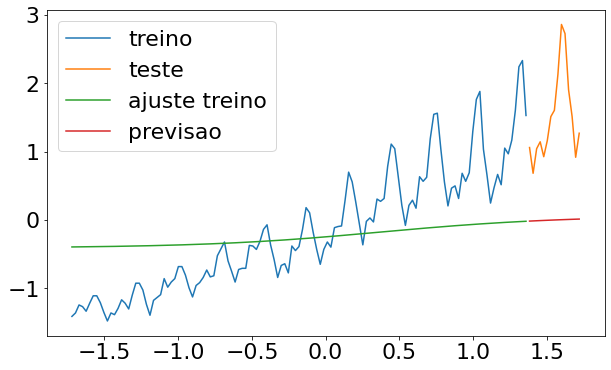

In [19]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_teste,y=y_teste,label='teste')
sns.lineplot(x=x_treino,y=y_predict[:,0],label='ajuste treino')
sns.lineplot(x=x_teste,y=y_predict_teste[:,0],label='previsao');

# Função de "atraso" 

### Essa funçao serve para dar um ajuste em uma serie temporal, dando um "atraso" nos dados.

In [20]:
vetor=pd.DataFrame(y_treino)[0]
def separa_dados(vetor,n_passos):
    X_novo,y_novo=[],[]
    
    for i in range(n_passos,vetor.shape[0]):
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    X_novo,y_novo=np.array(X_novo),np.array(y_novo)
    return X_novo,y_novo

In [21]:
#colocando o atraso de 1
x_treino_novo,y_treino_novo=separa_dados(vetor,1)
#exibindo os 5 primeiros dados de treino
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

# Rede Neural Sequencial 3

In [22]:
regressor3=Sequential()
regressor3.add(Dense(8,input_dim=1,kernel_initializer='ones',activation='linear',use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))#usando sigmoid
regressor3.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.fit(x_treino_novo,y_treino_novo,epochs=100)
y_predict_novo=regressor3.predict(x_treino_novo)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7607
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7358
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7100
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6872
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6635
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6378
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6090
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5795
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5514
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5161
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4825
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4434
Epoch 13/100
4/4 [==============================] - 0s 1ms/st

In [23]:
#dando atraso de 1
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2,1)

## Plotando os dados de treino com atraso de 1 

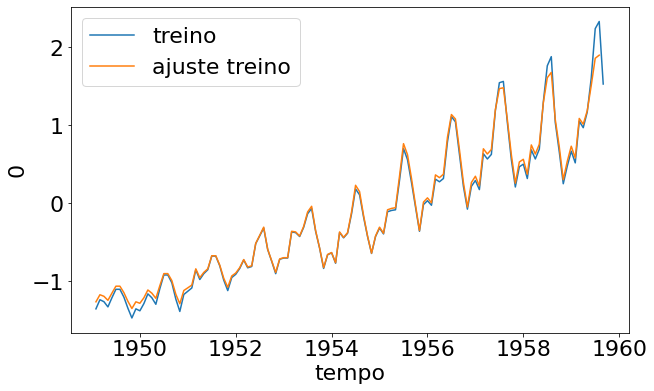

In [24]:
sns.lineplot(x='tempo',y=y_treino_novo,data=dados[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=dados[1:129],label='ajuste treino');

In [25]:
#dando o predict
y_predict_teste_novo=regressor3.predict(x_teste_novo)
resultado=pd.DataFrame(y_predict_teste_novo)[0]

## Plotando treino e teste com o predict com os passageiros escalados

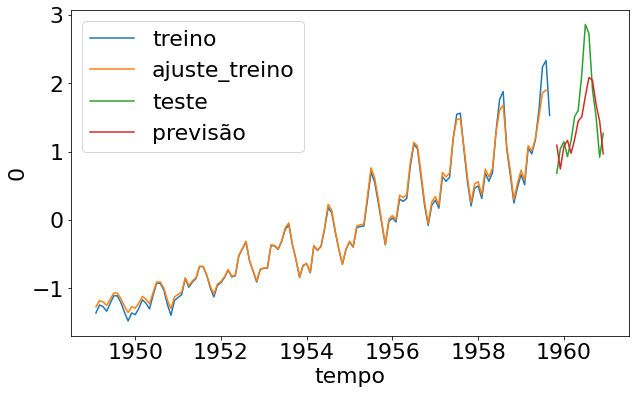

In [26]:
sns.lineplot(x='tempo',y=y_treino_novo,data=dados[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=dados[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=y_teste_novo,data=dados[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=dados[130:144],label='previsão');

In [27]:
#treino com atraso de 4
x_treino_novo,y_treino_novo=separa_dados(vetor,4)
#teste com atraso de 4
x_teste_novo,y_teste_novo=separa_dados(vetor2,4)

# Rede Neural Sequencial 4

In [28]:
regressor4=Sequential()
regressor4.add(Dense(8,input_dim=4,kernel_initializer='ones',activation='linear',use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))#usando sigmoid
regressor4.add(Dense(1,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.fit(x_treino_novo,y_treino_novo,epochs=300)
#dando predict
y_predict_novo=regressor4.predict(x_treino_novo)
y_predict_teste_novo=regressor4.predict(x_teste_novo)
#transformando os resultados em dataframe
resultado_treino=pd.DataFrame(y_predict_novo)[0]
resultado=pd.DataFrame(y_predict_teste_novo)[0]

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7686
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6822
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6081
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5383
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4752
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4121
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3539
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2954
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2482
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1792
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1608
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

## Plotando com previsoes e passageiros escalados

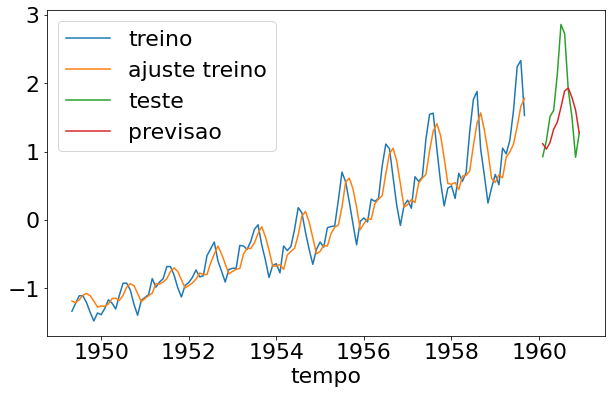

In [29]:
sns.lineplot(x='tempo',y=y_treino_novo,data=dados[4:129],label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values,data=dados[4:129],label='ajuste treino')
sns.lineplot(x='tempo',y=y_teste_novo,data=dados[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=dados[133:144],label='previsao');